The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [26]:
# Loading in required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Start coding here!
nobeldata = pd.read_csv('nobel.csv')
nobeldata.head()
nobeldata.shape
nobeldata.describe()
nobeldata.columns



# Find the most commonly awarded gender
top_gender = nobeldata['sex'].mode()[0]

# Find the most commonly awarded birth country
top_country = nobeldata['birth_country'].mode()[0]

top_gender, top_country

# top gender
#top_gender = nobeldata['sex'].value_counts(sort=True)

# top_country
#top_country = nobeldata['birth_country'].value_counts(sort=True)

# Convert the 'Year' column to a decade
nobeldata['Decade'] = (nobeldata['year'] // 10) * 10

# Filter US-born winners
us_winners = nobeldata[nobeldata['birth_country'] == 'United States of America']

# Count US-born winners by decade
us_winners_decade = us_winners.groupby('Decade').size()

# Count total winners by decade
total_winners_decade = nobeldata.groupby('Decade').size()

# Calculate the ratio of US-born winners to total winners by decade
ratio_decade = (us_winners_decade / total_winners_decade).fillna(0)

# Find the decade with the highest ratio
max_decade_usa = ratio_decade.idxmax()
max_decade_usa
# Filter female winners
female_winners = nobeldata[nobeldata['sex'] == 'Female']

# Count female winners by decade and category
female_winners_grouped = female_winners.groupby(['Decade', 'category']).size()

# Count total winners by decade and category
total_winners_grouped = nobeldata.groupby(['Decade', 'category']).size()

# Calculate the proportion of female winners by decade and category
proportion_female = (female_winners_grouped / total_winners_grouped).fillna(0)

# Find the decade and category with the highest proportion of female winners
max_female = proportion_female.idxmax()
max_female_dict = {max_female[0]: max_female[1]}
max_female_dict
# Find the first female winner
first_female_winner = nobeldata[nobeldata['sex'] == 'Female'].sort_values(by='year').iloc[0]
first_woman_name = first_female_winner['full_name']
first_woman_category = first_female_winner['category']
first_woman_name, first_woman_category

# Count the number of wins by each laureate
win_counts = nobeldata['full_name'].value_counts()

# Filter laureates with more than one win
repeat_winners = win_counts[win_counts > 1].index.tolist()
repeat_list = repeat_winners
repeat_list



['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']

In [27]:
top_gender

'Male'

In [28]:
top_country

'United States of America'

In [29]:
first_woman_name

'Marie Curie, née Sklodowska'

In [30]:
first_woman_category

'Physics'

In [31]:
nobeldata.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share', 'laureate_id',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'sex', 'organization_name', 'organization_city',
       'organization_country', 'death_date', 'death_city', 'death_country',
       'Decade'],
      dtype='object')

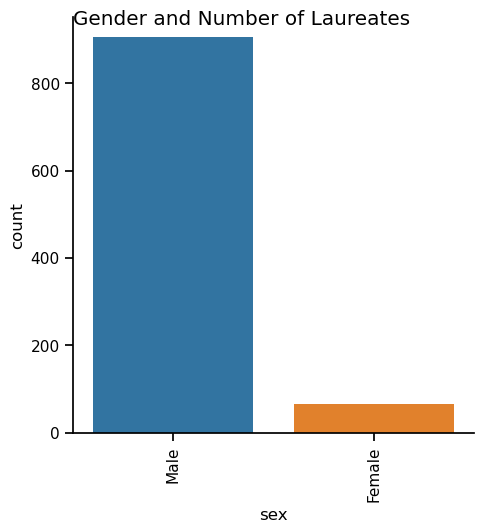

In [39]:
g= sns.catplot(x ='sex', data = nobeldata, kind='count')
g.fig.suptitle('Gender and Number of Laureates')
plt.xticks(rotation =90)
sns.set_context('notebook')

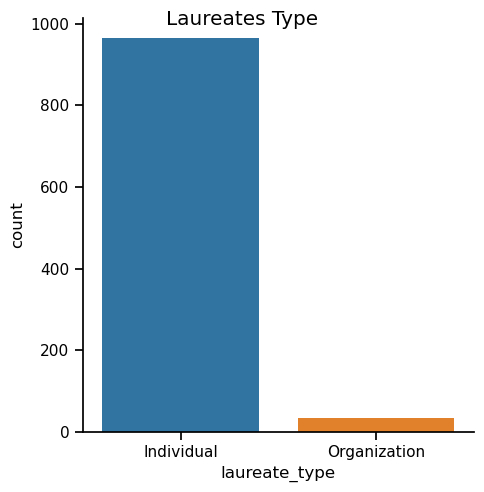

In [42]:
g= sns.catplot(x ='laureate_type', data = nobeldata, kind='count')
g.fig.suptitle('Laureates Type')
plt.xticks(rotation =0)
sns.set_context('notebook')

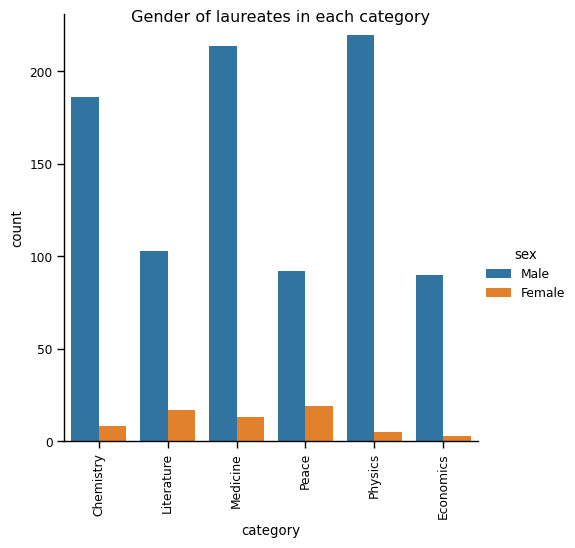

In [51]:
g= sns.catplot(x ='category', data = nobeldata, kind='count', hue ='sex')
g.fig.suptitle(' Gender of laureates in each category')
plt.xticks(rotation =90)
sns.set_context('paper')